**Nara Miranda Guimarães**

In [85]:
!pip install plotly==4.7.1

In [86]:
!pip install networkx

In [87]:
!pip install mlxtend

In [88]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import networkx as nx
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

**Importando os dados**

In [89]:
baskef_df = pd.read_csv("basket.csv", sep=",")
baskef_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Analisando o dataframe**

In [90]:
baskef_df.shape

(14963, 11)

In [91]:
baskef_df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
dtype: object

In [92]:
baskef_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,14963,14963,4883,2185,795,451,276,196,51,1,1
unique,165,165,154,146,126,101,88,72,35,1,1
top,whole milk,whole milk,whole milk,whole milk,whole milk,shopping bags,yogurt,whole milk,shopping bags,curd,newspapers
freq,1083,983,244,111,39,25,19,14,4,1,1


**Visualizar os itens mais frequentes das transações usando treemap**

In [93]:
# 1. transforma todas as transações em um numpy array

transaction = []

for i in range(0, baskef_df.shape[0]):
    for j in range(0, baskef_df.shape[1]):
        transaction.append(baskef_df.values[i,j])
        
transaction = np.array(transaction)
transaction

array(['whole milk', 'pastry', 'salty snack', ..., 'nan', 'nan', 'nan'],
      dtype='<U25')

In [94]:
# 2. transformando em um dataframe

df = pd.DataFrame(transaction, columns=["items"]) 
#adiciona coluna para contagem
df["incident_count"] = 1 
df.head()

,items,incident_count
0,whole milk,1
1,pastry,1
2,salty snack,1
3,nan,1
4,nan,1


In [95]:
# 3. Remove NaN 

indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

In [96]:
# 4. Criando uma visualização em tabela

df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


In [97]:
# Top 50

df_table["all"] = "all"
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',)
fig.show()

In [98]:
# Top 30

df_table["all"] = "all"
fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Blues',)
fig.show()

In [99]:
# Top 20

df_table["all"] = "all"
fig = px.treemap(df_table.head(20), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(20), hover_data=['items'],
                  color_continuous_scale='Blues',)
fig.show()

In [100]:
#Transforme cada transação em uma lista separada e agrupe em uma matriz numpy 
#Fazendo isso, seremos capazes de iterar por meio de uma série de transações

transaction = []
for i in range(baskef_df.shape[0]):
    transaction.append([str(baskef_df.values[i,j]) for j in range(baskef_df.shape[1])])
    
transaction = np.array(transaction)

In [101]:
#Cria um DataFrame para verificar o status dos 20 itens principais

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(baskef_df):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
            

df_top20_multiple_record_check.head(10)

,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,pastry,pip fruit,shopping bags,canned beer,bottled beer,whipped/sour cream,newspapers,frankfurter,brown bread,domestic eggs
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
df_top20_multiple_record_check.describe()

,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,pastry,pip fruit,shopping bags,canned beer,bottled beer,whipped/sour cream,newspapers,frankfurter,brown bread,domestic eggs
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.167212,0.126846,0.114683,0.101183,0.089153,0.071577,0.068970,0.062354,0.061752,0.054267,0.052463,0.049723,0.048854,0.047918,0.045913,0.044242,0.039832,0.038762,0.038161,0.037827
std,0.398805,0.347547,0.333810,0.315234,0.296695,0.265961,0.258374,0.248619,0.246746,0.231513,0.226534,0.220432,0.221382,0.218243,0.212158,0.208224,0.200297,0.198160,0.194361,0.194942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000


**Análise de escolha / Primeiras escolhas dos clientes**

In [103]:
# 1. Reúna apenas a primeira escolha de cada transação em Numpy Array
# Padrão semelhante ao acima, apenas a mudança é o número da coluna "0" na função Append

transaction = []
for i in range(0, baskef_df.shape[0]):
    transaction.append(baskef_df.values[i,0])

transaction = np.array(transaction)

In [104]:
#2. Transforma em um dataframe

df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

In [105]:
# 3. Deleta NaN 

indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

In [106]:
# Cria um novo df para as visualizações 

df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["basket"] = "Basket"
df_table_first = df_table_first.truncate(before=-1, after=15)

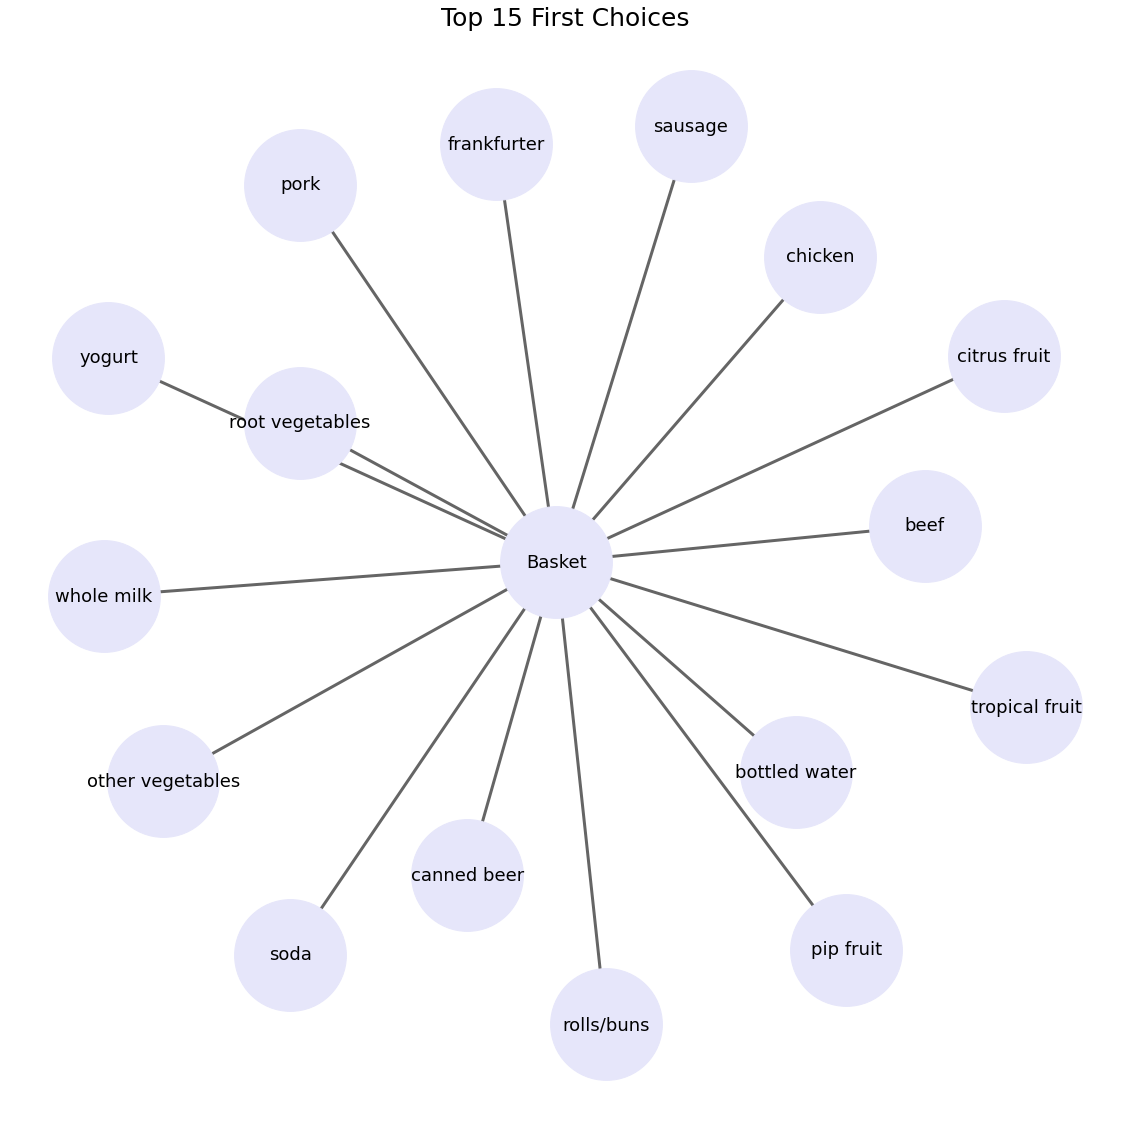

In [107]:
plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'basket', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

**Analisar a frequência dos primeiros itens mais comprados pelos clientes usando gráfico de barra**

In [108]:
# 1. Seleciona apenas a terceira escolha
## For Column "2"
transaction = []
for i in range(0, baskef_df.shape[0]):
    transaction.append(baskef_df.values[i,2])

transaction = np.array(transaction)

# 2. transforma em DataFrame
df_third = pd.DataFrame(transaction, columns=["items"]) # Transaction Item Name
df_third["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, Group By Will Be Done Later On

# 3. Deleta NaN 
indexNames = df_third[df_third['items'] == "nan" ].index
df_third.drop(indexNames , inplace=True)

df_table_third = df_third.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_third["basket"] = "Basket"
df_table_third = df_table_third.truncate(before=-1, after=15) 

In [109]:
fig = go.Figure(data=[go.Bar(x=df_table_third["items"], y=df_table_third["incident_count"],
            hovertext=df_table_third["items"], text=df_table_third["incident_count"], textposition="outside")])


fig.update_layout(title_text="Terceira Escolha dos Clientes", template="plotly_dark")
fig.show()

**Efetuar um pré-processamento para gerar uma matriz binária das transações**

In [110]:
transaction = []
for i in range(baskef_df.shape[0]):
    transaction.append([str(baskef_df.values[i,j]) for j in range(baskef_df.shape[1])])
    
transaction = np.array(transaction)
transaction

array([['whole milk', 'pastry', 'salty snack', ..., 'nan', 'nan', 'nan'],
       ['sausage', 'whole milk', 'semi-finished bread', ..., 'nan',
        'nan', 'nan'],
       ['soda', 'pickled vegetables', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['fruit/vegetable juice', 'onions', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['bottled beer', 'other vegetables', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['soda', 'root vegetables', 'semi-finished bread', ..., 'nan',
        'nan', 'nan']], dtype='<U25')

In [111]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [112]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,pastry,pip fruit,shopping bags,canned beer,bottled beer,whipped/sour cream,newspapers,frankfurter,brown bread,domestic eggs,pork,butter,fruit/vegetable juice,beef,curd,margarine,coffee,frozen vegetables,chicken,white bread,cream cheese,chocolate,dessert,napkins,hamburger meat,berries,UHT-milk,onions,salty snack,waffles,long life bakery product,sugar,butter milk,ham,meat,frozen meals,beverages,specialty chocolate,misc. beverages,ice cream
0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
14961,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [113]:
# Convert dataset into 1-0 encoding

def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,pastry,pip fruit,shopping bags,canned beer,bottled beer,whipped/sour cream,newspapers,frankfurter,brown bread,domestic eggs,pork,butter,fruit/vegetable juice,beef,curd,margarine,coffee,frozen vegetables,chicken,white bread,cream cheese,chocolate,dessert,napkins,hamburger meat,berries,UHT-milk,onions,salty snack,waffles,long life bakery product,sugar,butter milk,ham,meat,frozen meals,beverages,specialty chocolate,misc. beverages,ice cream
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Aplicar o algoritmo Apriori usando min_support=0.001**

In [114]:
frequent_itemsets = apriori(dataset, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.122101,(other vegetables),1
2,0.110005,(rolls/buns),1
3,0.097106,(soda),1
4,0.085879,(yogurt),1
...,...,...,...
575,0.001337,"(whole milk, rolls/buns, yogurt)",3
576,0.001136,"(whole milk, sausage, rolls/buns)",3
577,0.001069,"(whole milk, sausage, soda)",3
578,0.001470,"(whole milk, sausage, yogurt)",3


**Analisar os itemsets de tamanho igual a 3 e suporte >= 0.001**

In [115]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.001) ]

,support,itemsets,length
571,0.001203,"(whole milk, rolls/buns, other vegetables)",3
572,0.001136,"(whole milk, soda, other vegetables)",3
573,0.001136,"(whole milk, yogurt, other vegetables)",3
574,0.001002,"(whole milk, rolls/buns, soda)",3
575,0.001337,"(whole milk, rolls/buns, yogurt)",3
576,0.001136,"(whole milk, sausage, rolls/buns)",3
577,0.001069,"(whole milk, sausage, soda)",3
578,0.001470,"(whole milk, sausage, yogurt)",3
579,0.001136,"(soda, rolls/buns, other vegetables)",3


In [116]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
571,0.001203,"(whole milk, rolls/buns, other vegetables)",3
572,0.001136,"(whole milk, soda, other vegetables)",3
573,0.001136,"(whole milk, yogurt, other vegetables)",3
574,0.001002,"(whole milk, rolls/buns, soda)",3
575,0.001337,"(whole milk, rolls/buns, yogurt)",3


**Minerar regras de associação considerando a métrica lift usando limiar =1.1**

In [117]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
97,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,2,1
100,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,1,2
96,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,2,1
101,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,1,2
26,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,1,1
103,"(rolls/buns, other vegetables)",(soda),0.010559,0.097106,0.001136,0.107595,1.108013,0.000111,1.011753,2,1
104,(soda),"(rolls/buns, other vegetables)",0.097106,0.010559,0.001136,0.011700,1.108013,0.000111,1.001154,1,2
41,(frozen vegetables),(bottled beer),0.028002,0.045312,0.001403,0.050119,1.106100,0.000135,1.005061,1,1


**Ordenar as regras de associação encontradas pela medida de confiança**

In [118]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
98,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,2,1
86,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,2,1
92,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,2,1
96,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,2,1
102,"(soda, rolls/buns)",(other vegetables),0.008087,0.122101,0.001136,0.140496,1.150651,0.000149,1.021402,2,1
...,...,...,...,...,...,...,...,...,...,...,...
89,(rolls/buns),"(whole milk, sausage)",0.110005,0.008955,0.001136,0.010328,1.153275,0.000151,1.001387,1,2
99,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,1,2
105,(other vegetables),"(soda, rolls/buns)",0.122101,0.008087,0.001136,0.009305,1.150651,0.000149,1.001230,1,2
87,(whole milk),"(sausage, rolls/buns)",0.157923,0.005347,0.001136,0.007194,1.345594,0.000292,1.001861,1,2


De acordo com a tabela acima, os consumidores que adquirirem yogurt, sausage comprarão whole milk com probabilidade de 25% (confiança). As pontuações de aumento e convicção também apóiam essa hipótese

Seria melhor mantê-los por perto para aumentar as vendas!

**Filtrar as regras de associação em que o item mais frequente está presente como antecedente na regra**

In [120]:
rules[~rules["consequents"].str.contains("whole milk", regex=False) & 
      ~rules["antecedents"].str.contains("whole milk", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
102,"(soda, rolls/buns)",(other vegetables),0.008087,0.122101,0.001136,0.140496,1.150651,0.000149,1.021402,2,1
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,1,1
2,(beverages),(soda),0.016574,0.097106,0.001871,0.112903,1.162678,0.000262,1.017808,1,1
103,"(rolls/buns, other vegetables)",(soda),0.010559,0.097106,0.001136,0.107595,1.108013,0.000111,1.011753,2,1
5,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,1,1
20,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,1,1
26,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,1,1
14,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531,1,1
8,(specialty chocolate),(tropical fruit),0.015973,0.067767,0.001337,0.083682,1.234846,0.000254,1.017368,1,1
11,(sugar),(bottled water),0.017710,0.060683,0.001470,0.083019,1.368074,0.000396,1.024358,1,1


Após excluir o leite integral (whole milk) da tabela acima, a confiança entre os items foi inferior a 15%, apresentando baixa relação de associação


In [121]:
# Visualizando apenas as relações com confiança acima de 10% 

rules.query('confidence >= 0.10')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,1,1
2,(beverages),(soda),0.016574,0.097106,0.001871,0.112903,1.162678,0.000262,1.017808,1,1
84,"(whole milk, sausage)",(rolls/buns),0.008955,0.110005,0.001136,0.126866,1.153275,0.000151,1.019311,2,1
86,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,2,1
90,"(whole milk, sausage)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,0.000200,1.025320,2,1
92,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,2,1
96,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,2,1
97,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,2,1
98,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,2,1
102,"(soda, rolls/buns)",(other vegetables),0.008087,0.122101,0.001136,0.140496,1.150651,0.000149,1.021402,2,1
